In [5]:
%pylab inline
dat1 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_Nomoto2013_net.npz')
dat2 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_chieffi04_net.npz')
dat3 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_normalised_element_predictions_NuGrid_net.npz')
#dat3 = np.load('/home/philcox/Save/IllustrisOverall/Hogg_element_predictions_Frischknecht16_net.npz')

name_list = ['C04','N13','R17']
shape_list = ['o','s','^']
color_list = ['r','b','k']

data_list = [dat2,dat1,dat3]#[dat,dat,dat1]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]
elements = dat1['elements']
scores = [dat['scores'] for dat in [dat1,dat2]]
norm_scores = [dat['normalised_scores'] for dat in [dat3]]

dat1.close()
dat2.close()
dat3.close()

Populating the interactive namespace from numpy and matplotlib


In [6]:
#  Reorder
alpha_names = ['He','C','N','O','Ne','Mg','Si','Fe']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig = [],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)

In [7]:
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

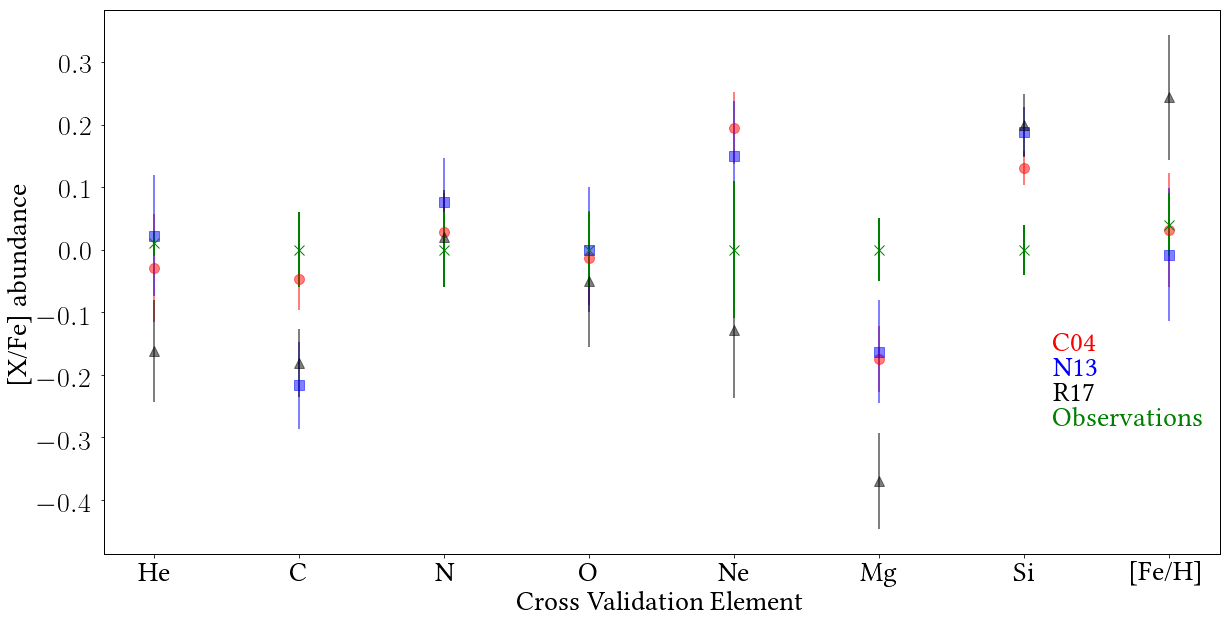

In [8]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 28
marker_size= 10
small_text = 28
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials
for i in range(3):
    plt.errorbar(np.arange(len(alpha_names)),alphamean[i],alphasigma[i],fmt=shape_list[i],ms=marker_size,c=color_list[i],alpha=0.5,label=name_list[i])
    plt.text(6.2,-0.16-0.04*i,name_list[i],color=color_list[i])
plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='g',label='Observations')
plt.text(6.2,-0.16-0.04*3,'Observations',color='g')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
elements = elements.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)
plt.savefig('PaperPlots/Illustris_element_prediction.pdf',dpi=300,bbox_inches='tight')

In [10]:
from Chempy.parameter import ModelParameters
a = ModelParameters()
n_el = 8 #len(a.initial_neural_names)

# Table of scores
print('Yield Set \t Normalised LOO-CV Score')
print('----------------------------------')
for i in range(len(data_list)):
    print('%s: \t\t %.3f + %.3f - %.3f' %(name_list[i],np.median(scores[i]/n_el),
                                     np.percentile(scores[i]/n_el,100-15.865)-np.median(scores[i]/n_el),
                                     np.median(scores[i]/n_el)-np.percentile(scores[i]/n_el,15.865)))


Yield Set 	 Normalised LOO-CV Score
----------------------------------
C04: 		 0.229 + 0.015 - 0.014
N13: 		 0.021 + 0.020 - 0.030


# BAYES SCORES 

In [10]:
# Load datasets
bdat1 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
bdat2 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
bdat3 = np.load('/home/philcox/Save/IllustrisOverall/Bayes_score - NuGrid_net, Karakas_net_yield, Seitenzahl.npz')

bdat_list = [bdat2,bdat1,bdat3]
bnames = ['C04','N13','R17']

bscores = [bdat['score'] for bdat in bdat_list]
bscores_err = [bdat['score_err'] for bdat in bdat_list]

bdat1.close()
bdat2.close()
bdat3.close()

In [11]:
# Table of scores
print('Yield Set \t Bayes Score')
print('----------------------------------')
for i in range(len(data_list)):
    print('%s: \t\t %.4f +/- %.4f' %(bnames[i],np.log10(bscores[i]),bscores_err[i]/(bscores[i]*np.log(10))))

Yield Set 	 Bayes Score
----------------------------------
C04: 		 1.6105 +/- 0.0021
N13: 		 0.6475 +/- 0.0027
R17: 		 -0.3360 +/- 0.0014


In [134]:
from Chempy.yields import SN2_feedback
basic_sn2 = SN2_feedback()
getattr(basic_sn2,'Frischknecht16_net')()

In [96]:
from Chempy.yields import SN2_feedback
basic2_sn2 = SN2_feedback()
getattr(basic2_sn2,'Nomoto2013_net')()

In [97]:
from Chempy.yields import SN2_feedback
basic3_sn2 = SN2_feedback()
getattr(basic3_sn2,'chieffi04_net')()

In [101]:
basic3_sn2.table[1e-3][-1]

( 35.,  0.05857143,  0.94142857,  0.00021391,  0.00060687,   5.65107622e-10,  -2.46203854e-10,  -7.62931260e-12,   5.93547458e-10,  0.02380071,  0.00053483,   2.52532963e-06,   1.53921756e-06,  0.00010877,   2.65881108e-07,   1.41142190e-08,  0.00290974,   1.23744680e-08,   2.71583270e-08, -0.29500286,  0.07357622,   9.92451780e-07,   4.60799455e-09,  -4.71889524e-10,  0.00666058,   2.21498041e-05,   6.53811966e-09,  0.00014187,  0.00024722,   1.64218397e-11,  0.03774286,   2.13173975e-05,  0.13897476,   8.93714943e-06,  -7.55902077e-11,  0.00306313,   2.33106380e-08,   3.40629414e-09,  0.00635679,   4.96395917e-09,   6.03501331e-06,   4.00468367e-07,   5.44226877e-10,   3.31806445e-07,   4.88509298e-10)

In [133]:
dN=basic2_sn2.table[1e-3][1]
dF=basic_sn2.table[1e-3][0]
dC = basic3_sn2.table[1e-3][1]

small_dat = [[],[],[]]

for j,data in enumerate([dN,dF,dC]):
    for el in a.element_names:
        for i in range(len(data)):
            if data.dtype.names[i] == el:
                small_dat[j].append(data[i])

N = small_dat[0]
F = small_dat[1]
C = small_dat[2]
                
diff = []
print('Property:    N13 \t F16       \t C04')
print('---------------------------------------------------')
for i in range(len(a.element_names)):
    print('%s \t %.3e \t %.3e \t %.3e' %(a.element_names[i],N[i],F[i],C[i]))
#    diff.append(np.log10(dN[i]/dF[i]))
    
#for i in range(len(dN)):
#    print('%s \t %.3e' %(dN.dtype.names[i],diff[i]))

Property:    N13 	 F16       	 C04
---------------------------------------------------
He 	 1.221e-01 	 9.587e-02 	 9.004e-02
C 	 5.527e-03 	 4.413e-02 	 1.213e-02
N 	 1.876e-04 	 4.817e-04 	 1.493e-04
O 	 1.916e-02 	 9.729e-02 	 3.471e-02
F 	 -9.110e-09 	 2.293e-06 	 -6.797e-09
Ne 	 1.262e-02 	 1.259e-02 	 8.050e-03
Na 	 1.288e-04 	 2.866e-04 	 6.843e-05
Mg 	 4.352e-03 	 9.725e-04 	 4.287e-03
Al 	 1.540e-04 	 7.613e-05 	 9.879e-05
Si 	 2.879e-03 	 2.579e-05 	 6.986e-03
P 	 5.132e-06 	 3.601e-07 	 1.559e-05
S 	 1.095e-03 	 -9.173e-07 	 3.106e-03
Cl 	 5.017e-07 	 1.509e-07 	 4.100e-06
Ar 	 1.610e-04 	 -4.729e-08 	 5.842e-04
K 	 1.308e-07 	 3.348e-08 	 1.989e-06
Ca 	 1.135e-04 	 -1.645e-07 	 5.112e-04
Sc 	 1.560e-09 	 3.755e-09 	 6.662e-09
Ti 	 5.124e-06 	 9.373e-09 	 1.373e-05
V 	 1.061e-06 	 -6.265e-10 	 7.106e-07
Cr 	 2.223e-05 	 -1.226e-08 	 1.197e-04
Mn 	 4.901e-06 	 -2.784e-08 	 3.804e-05
Fe 	 4.799e-03 	 -1.441e-06 	 6.924e-03
Co 	 1.528e-05 	 3.878e-07 	 9.844e-06
Ni 	 2.459e-04 

In [102]:
basic2_sn2.masses

array([13, 15, 18, 20, 25, 30, 40])

In [106]:
basic_sn2.masses

array([15, 20, 25, 40])

In [138]:
basic_sn2.table[1e-3][0]['Fe']

-1.4405736166666666e-06

In [142]:
(-4.003516405e-06-4.066417232e-05+4.503507935e-06+1.855557654e-05)/15

-1.4405736166666666e-06

In [144]:
from Chempy.solar_abundance import solar_abundances
basic_solar = solar_abundances()
getattr(basic_solar,'Asplund09')()

In [155]:
basic_solar.fractions
basic_solar.all_elements
basic_solar.fractions[25] # Fe

0.0012919670374607077

In [158]:

basic2_sn2.metallicities

[0.05, 0.02, 0.008, 0.004, 0.001]

In [159]:
nomdat = np.load('Chempy/input/yields/Nomoto2013/nomoto_net_met_ind_1.npy')

In [161]:
nomdat[1]['Fe']

0.0043866291853523623